In [1]:
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib


import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import xlrd

from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection #might be model_selection <--- this is the new one
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
import xgboost as xgb

sns.set_style("whitegrid")
%matplotlib inline

scipy: 0.19.1
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0


C:\Users\SuperBug\Anaconda2\envs\mdg\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_excel('ATTENDEEISSA2017NumericalExcelCleaned.xlsx', header = 0)
#data_antendees = pd.read_excel('HW3Data.xlsx', sheetname = 'trainY')

In [3]:
#data_a, data_b = train_test_split(data, test_size=0.2, random_state = 7)

In [4]:
data.shape

(760, 165)

In [5]:
data_a = data.apply(pd.to_numeric, errors='ignore')    #changes dataframe dtypes to their lowest

In [6]:
data_a.shape

(760, 165)

In [7]:
cols = list(data_a)    # THIS DROPS ALL COLUMNS THAT HAVE THE SAME VALUE
nunique = data_a.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data_a = data_a.drop(cols_to_drop, axis=1)

In [8]:
data_a.shape

(760, 156)

In [9]:
#data_a = data_a.loc[: , ~data_a.columns.duplicated()]#i think this is only column name

In [10]:
data_a = data_a.T.drop_duplicates().T

In [11]:
data_a.shape

(760, 148)

In [12]:
data_a = data_a.dropna(axis=1, how='all')

In [13]:
data_a = data_a.dropna(axis=0, how='all')

In [14]:
data_a.shape

(760, 147)

In [17]:
data_a.shape

(760, 147)

In [19]:
data_a = data_a.apply(pd.to_numeric, errors='ignore') 

In [20]:
data_a.dtypes

Ability to meet peers                                                                                                              float64
ARCSI Evening Receptions                                                                                                           float64
ARCSI Rountables                                                                                                                   float64
Are you a member of a distributor marketing group? If yes, please list which one in the comments box.                              float64
ARSCI Roundtables                                                                                                                  float64
Booth visits to a new exhibitor or supplier:                                                                                       float64
Co-located events by other associations                                                                                            float64
Comments                   

In [21]:
corr = data_a.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()


In [22]:
testcorr = corr.dropna(axis=1, how='all')

In [23]:
testcorr = testcorr.dropna(axis=0, how='all')

In [24]:
plt.figure(figsize=(150, 150))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

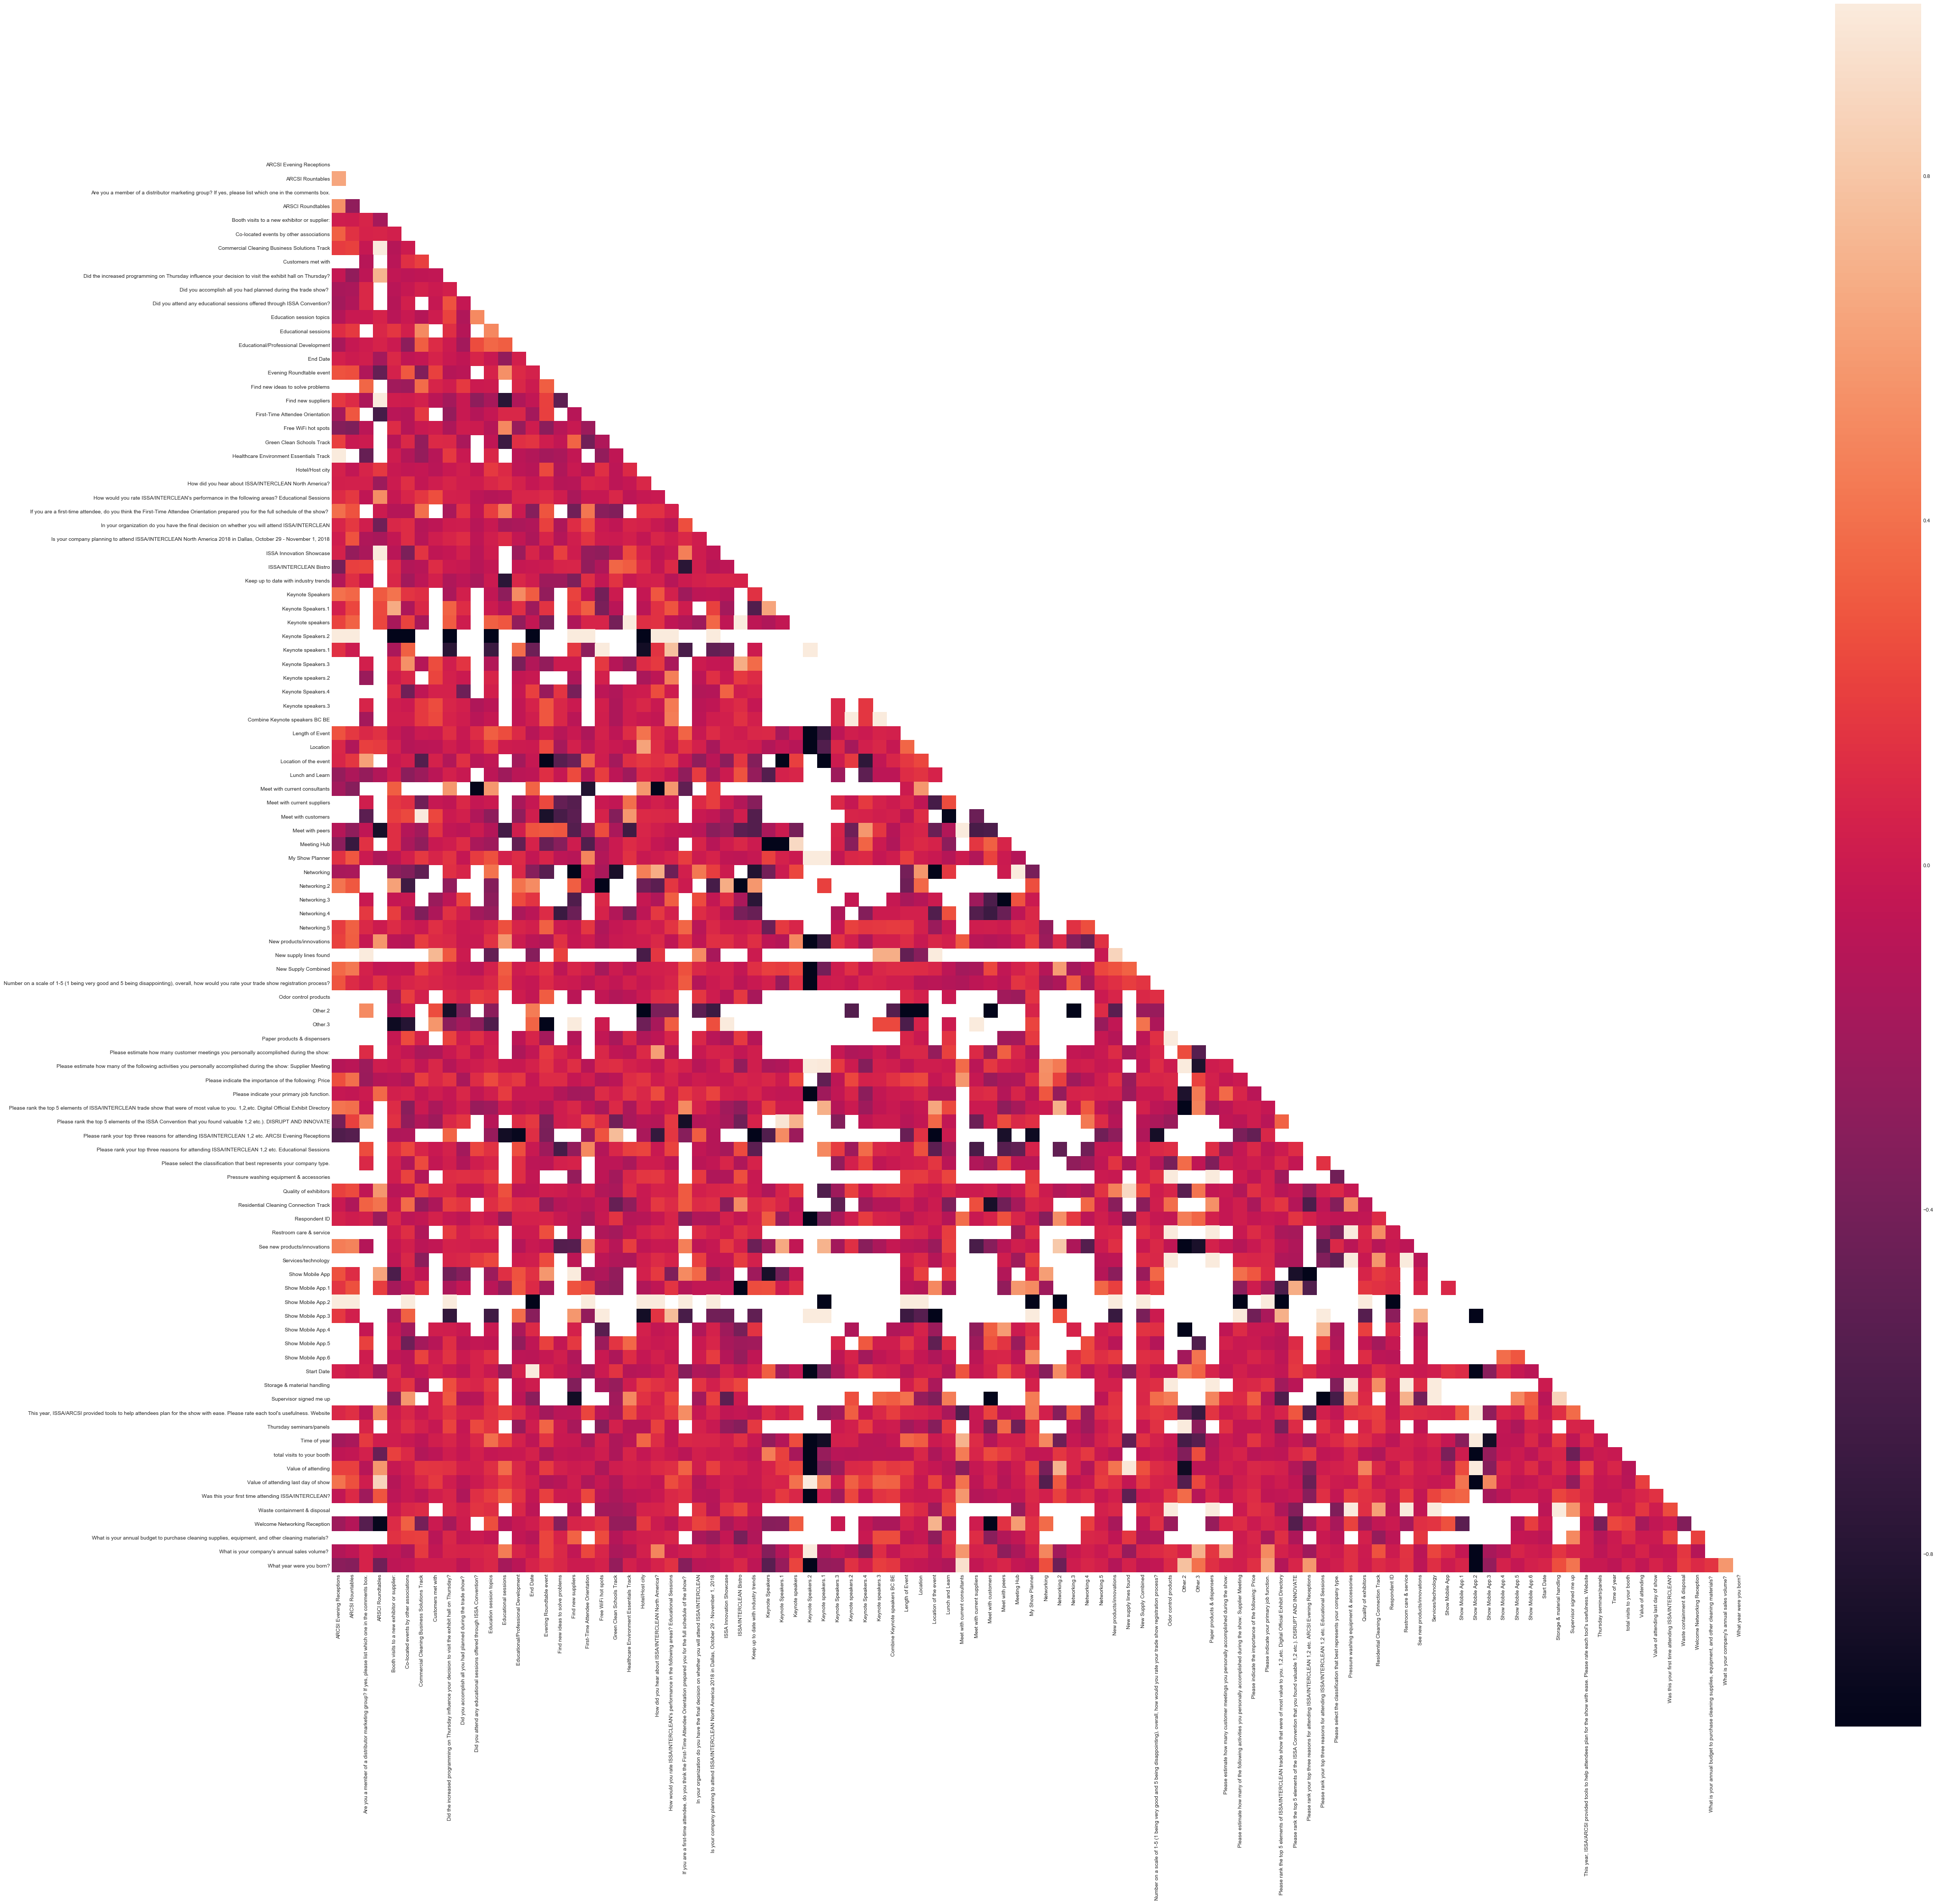

In [145]:
mask = np.zeros_like(testcorr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(testcorr, mask=mask, vmin = -1, vmax=1, square=True)

In [31]:
sum_happy = []
for a in range(0,len(data_a.iloc[:,36])):
    if data_a.iloc[a,36] == 5 or data_a.iloc[a,36]==4:
        sum_happy.append(3)
    elif data_a.iloc[a,36] == 3:
        sum_happy.append(2)
    elif data_a.iloc[a,36] ==2 or data_a.iloc[a,36]==1:
        sum_happy.append(1)

        

In [25]:
data_a = data_a[np.isfinite(data_a['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'])] #drop rows that dont have company planning to attend

In [32]:
data_a['sum_happy'] = sum_happy

In [ ]:
testcorr = data_a.iloc[:,26:73]
plt.figure(figsize=(150, 150))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

In [ ]:
plt.figure(figsize=(60, 60))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

In [ ]:
corr

In [33]:
data_a.shape

(513, 148)

In [145]:
data_Y = data_a['sum_happy']

In [146]:
data_X = data_a

In [147]:
data_X = data_X.drop(['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'],axis = 1)

In [148]:
data_X = data_X.drop(['sum_happy'],axis=1)

In [149]:
data_X.shape

(513, 146)

In [39]:
for a in range(0, len(data_X.columns)):
    print a, data_X.columns[a]

0 Ability to meet peers
1 ARCSI Evening Receptions
2 ARCSI Rountables
3 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
4 ARSCI Roundtables
5 Booth visits to a new exhibitor or supplier:
6 Co-located events by other associations
7 Comments
8 Commercial Cleaning Business Solutions Track
9 Customers met with
10 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
11 Did you accomplish all you had planned during the trade show? 
12 Did you attend any educational sessions offered through ISSA Convention?
13 Education session topics
14 Educational sessions
15 Educational/Professional Development
16 Email
17 Email.1
18 End Date
19 Evening Roundtable event
20 Find new ideas to solve problems
21 Find new suppliers
22 First Name
23 First-Time Attendee Orientation
24 Free WiFi hot spots
25 Green Clean Schools Track
26 Healthcare Environment Essentials Track
27 Hotel/Host city
28 How did you 

In [150]:
data_X = data_X.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:]

In [151]:
data_X = data_X.astype(float)

In [152]:
data_Y = data_Y.astype(float)

In [55]:
data_X

ARCSI Evening Receptions  ARCSI Rountables  \
1                         NaN               NaN   
2                         NaN               NaN   
3                         NaN               NaN   
4                         NaN               NaN   
5                         NaN               NaN   
7                         NaN               NaN   
9                         NaN               NaN   
10                        NaN               NaN   
11                        NaN               NaN   
12                        NaN               NaN   
13                        NaN               NaN   
14                        NaN               NaN   
15                        NaN               NaN   
16                        NaN               NaN   
17                        NaN               NaN   
18                        3.0               3.0   
19                        NaN               NaN   
20                        NaN               NaN   
21                        NaN               NaN   
22                        1.0               1.0   
23                        NaN               NaN   
24                        NaN               NaN   
25                        NaN               NaN   
27                        NaN               NaN   
28                        NaN               NaN   
29                        NaN               NaN   
30                        NaN               NaN   
31                        NaN               NaN   
34                        NaN               NaN   
35                        NaN               NaN   
..                        ...               ...   
717                       NaN               NaN   
719                       NaN               NaN   
721                       1.0               1.0   
722                       NaN               NaN   
723                       NaN               NaN   
725                       1.0               1.0   
726                       NaN               NaN   
727                       NaN               NaN   
730                       NaN               NaN   
731                       NaN               NaN   
733                       NaN               NaN   
734                       3.0               4.0   
735                       NaN               NaN   
736                       NaN               NaN   
737                       1.0               1.0   
738                       NaN               NaN   
739                       NaN               NaN   
740                       NaN               NaN   
742                       NaN               NaN   
744                       NaN               NaN   
745                       NaN               NaN   
746                       NaN               NaN   
747                       NaN               NaN   
748                       NaN               NaN   
749                       NaN               NaN   
752                       NaN               NaN   
753                       NaN               NaN   
754                       NaN               NaN   
755                       2.0               2.0   
756                       3.0               4.0   

     Are you a member of a distributor marketing group? If yes, please list which one in the comments box.  \
1                                                  2.0                                                       
2                                                  NaN                                                       
3                                                  NaN                                                       
4                                                  NaN                                                       
5                                                  NaN                                                       
7                                                  2.0                                                       
9                                                  1.0                  

In [153]:
data_X = data_X.drop([234])
data_Y = data_Y.drop([234])
data_Xtest = pd.get_dummies(data_X, columns = data_X[data_X.columns[data_X.max() < 15]].columns)

In [154]:

data_X_hold = data_Xtest.columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
imp.fit(data_Xtest)
data_T=imp.transform(data_Xtest)
data_X = pd.DataFrame(data_T, columns = data_X_hold)

In [ ]:
y_test = pd.get_dummies(y)

In [211]:
Z=[]
Z=pd.concat([data_X,y_test],axis=1)

In [212]:
corr = Z.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [214]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(150, 150))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
scaler = Normalizer().fit(data_X)   # always want to save the value you returned
normalizedX = scaler.transform(data_X)
data_X = normalizedX


In [ ]:
#data_X = data_X.fillna(-1)

In [ ]:
#scikit-learn indeed strips the column headers in most cases, so just add them back on afterward. 
#In your example, with X_imputed as the sklearn.preprocessing output and X_train as the original dataframe, 
#you can put the column headers back on with:

#X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

In [215]:
X = data_X
y = data_Y

In [216]:

num_folds = 10
num_instances = len(X) 
seed = 7
scoring = None



In [217]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.667722 (0.072344)
NB: 0.197436 (0.143421)
CART: 0.568288 (0.042956)
KNeighborsClassifier: 0.640309 (0.060879)
XGBClassifier: 0.665686 (0.070431)
GradientBoostingClassifier: 0.673529 (0.057443)
AdaBoostClassifier: 0.591742 (0.077272)
RandomForestClassifier: 0.679412 (0.073160)
ExtraTreesClassifier: 0.675528 (0.071453)
DecisionTreeClassifier: 0.568288 (0.042956)


In [218]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 1
Feature Ranking: [  6   8   2   5   1   7   4   3 143 134 183 225 324 221 120 288 274 154
  90 111 316 354 355  63 169 201 291 102 258 215 207 392 270  84  38  92
 150 171  15  20  32  30 178 179 161  86 125 108 175 313 297 389 137 222
 233  87  58 373 267 211 302 365 218 167 176 282 286 163 328 105  53 147
 189  95 124 353 340 300 350 121 174 226 195  55  21 245 346 368 153 166
 306 279 146 132  11 262 229 234  54  50  77  79 106 309 235 265 364 334
 352  68 135 140 266 345 238 203 390 224  45 188 219 271 378 318 317 376
 327 369 341 322 362 303 243 295 264 182 382 380 337 276 263 370 160 209
 257 250 130 100 117 109 339 363 206 287 330 136 119 377  56 197  93 202
  91  35  70 114  19  37 127 359  23  17  98 259 268  74 227  46 252 326
 112 289 107 342 361  42  40 156 242 177 228 204 261  71 281 192 196  82
 293 371  62  69 103  60 273 375 385 283 323 296 356 320 142 101 246 290
 247  36  44  13  28  59 315  34  67  27 241  80 387 388 162 244  29 118
  89 210 145 299

In [ ]:
corr = data_a.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [219]:
for a in range(1, 10):
    print a

1
2
3
4
5
6
7
8
9


In [228]:
new_features = [] 
for a in range(1, 16):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            new_features.append(b)
            print b, data_X.columns[b]

4 Respondent ID
2 First-Time Attendee Orientation
7 What year were you born?
6 total visits to your booth
3 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
0 Booth visits to a new exhibitor or supplier:
5 Start Date
1 End Date
372 Was this your first time attending ISSA/INTERCLEAN?_1.0
373 Was this your first time attending ISSA/INTERCLEAN?_2.0
94 How did you hear about ISSA/INTERCLEAN North America?_6.0
363 Value of attending_1.0
219 Networking.5_2.0
365 Value of attending_3.0
38 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0


In [227]:
X['Respondent ID']

0      7.733907e+15
1      6.453341e+09
2      6.453208e+09
3      6.452672e+09
4      6.452329e+09
5      6.449343e+09
6      6.447790e+09
7      6.447771e+09
8      6.447465e+09
9      6.447280e+09
10     6.447279e+09
11     6.447229e+09
12     6.447217e+09
13     6.447181e+09
14     6.447115e+09
15     6.447115e+09
16     6.446972e+09
17     6.446836e+09
18     6.446483e+09
19     6.446421e+09
20     6.446141e+09
21     6.446113e+09
22     6.446063e+09
23     6.445910e+09
24     6.445906e+09
25     6.445891e+09
26     6.445886e+09
27     6.445884e+09
28     6.445752e+09
29     6.445707e+09
           ...     
482    6.426087e+09
483    6.426086e+09
484    6.426085e+09
485    6.424591e+09
486    6.424590e+09
487    6.422854e+09
488    6.422851e+09
489    6.422844e+09
490    6.422840e+09
491    6.422835e+09
492    6.422827e+09
493    6.422824e+09
494    6.422820e+09
495    6.420436e+09
496    6.420430e+09
497    6.420411e+09
498    6.420390e+09
499    6.420370e+09
500    6.420290e+09


In [229]:
new_X = data_X.iloc[:,new_features]

In [230]:
X = new_X

In [232]:
y_test = pd.get_dummies(y)

In [207]:
y_test

1.0  2.0  3.0
1      1    0    0
2      1    0    0
3      1    0    0
4      0    1    0
5      1    0    0
7      0    1    0
9      1    0    0
10     1    0    0
11     0    1    0
12     1    0    0
13     1    0    0
14     1    0    0
15     1    0    0
16     1    0    0
17     1    0    0
18     1    0    0
19     1    0    0
20     1    0    0
21     1    0    0
22     1    0    0
23     1    0    0
24     1    0    0
25     1    0    0
27     0    0    1
28     1    0    0
29     1    0    0
30     1    0    0
31     1    0    0
34     1    0    0
35     1    0    0
..   ...  ...  ...
717    1    0    0
719    1    0    0
721    1    0    0
722    1    0    0
723    1    0    0
725    1    0    0
726    0    0    1
727    1    0    0
730    0    0    1
731    0    0    1
733    0    0    1
734    0    0    1
735    1    0    0
736    1    0    0
737    1    0    0
738    1    0    0
739    0    0    1
740    0    0    1
742    0    0    1
744    0    0    1
745    0    1    0
746    0    0    1
747    0    0    1
748    0    0    1
749    1    0    0
752    1    0    0
753    0    0    1
754    1    0    0
755    1    0    0
756    0    0    1

[512 rows x 3 columns]

In [233]:
Z=[]
Z=pd.concat([X,y_test],axis=1)

In [234]:
corr = Z.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

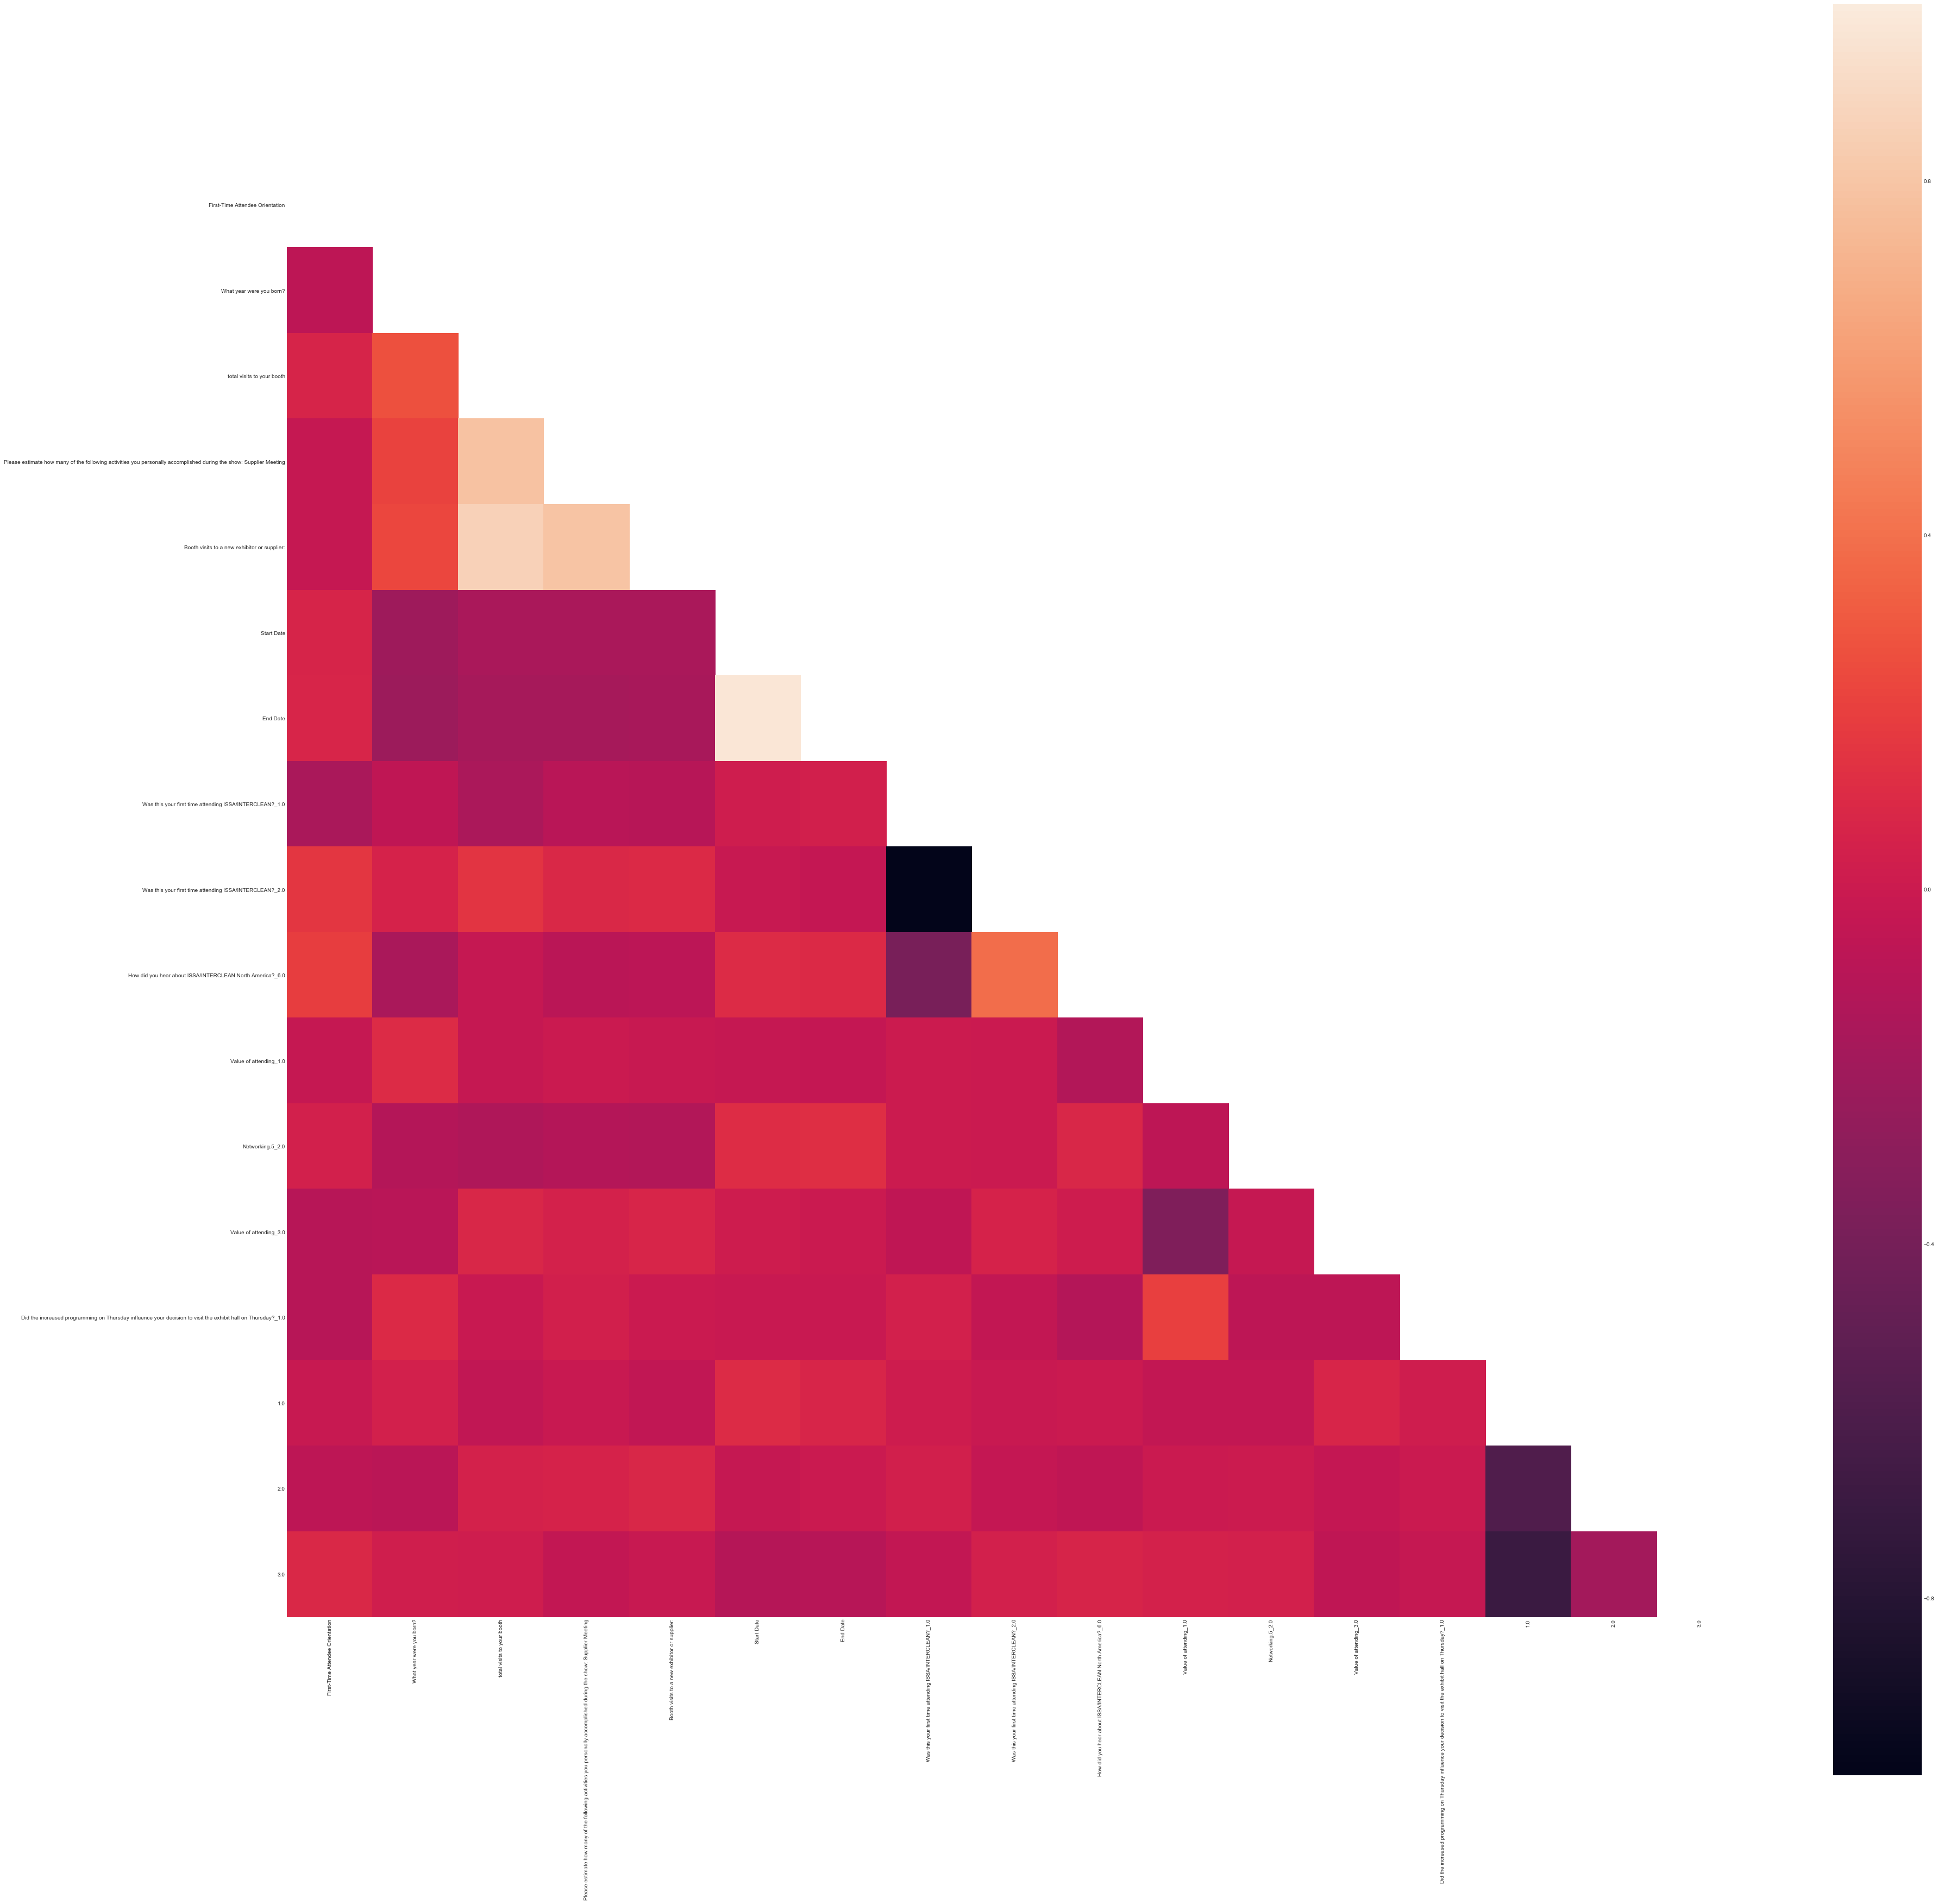

In [235]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [181]:
first_new_f = new_features

In [196]:
X

Booth visits to a new exhibitor or supplier:      End Date  \
0                                    1.000000e+01  1.508112e+18   
1                                    7.000000e+00  1.508107e+18   
2                                    1.000000e+01  1.508085e+18   
3                                    1.000000e+01  1.508075e+18   
4                                    4.000000e+01  1.508056e+18   
5                                    1.500000e+01  1.507816e+18   
6                                    5.000000e+01  1.507810e+18   
7                                    7.772177e+15  1.507803e+18   
8                                    2.000000e+01  1.507798e+18   
9                                    7.772156e+15  1.507799e+18   
10                                   8.000000e+00  1.507797e+18   
11                                   1.000000e+02  1.507797e+18   
12                                   7.772145e+15  1.507797e+18   
13                                   1.000000e+01  1.507798e+18   
14                                   2.500000e+01  1.507795e+18   
15                                   8.000000e+00  1.507791e+18   
16                                   7.772097e+15  1.507787e+18   
17                                   7.772022e+15  1.507773e+18   
18                                   5.000000e+01  1.507769e+18   
19                                   7.732061e+15  1.507752e+18   
20                                   7.771910e+15  1.507751e+18   
21                                   8.000000e+00  1.507749e+18   
22                                   2.500000e+01  1.507747e+18   
23                                   5.000000e+01  1.507742e+18   
24                                   7.751878e+15  1.507740e+18   
25                                   5.000000e+00  1.507740e+18   
26                                   3.000000e+01  1.507740e+18   
27                                   1.000000e+01  1.507741e+18   
28                                   5.000000e+00  1.507733e+18   
29                                   2.000000e+00  1.507733e+18   
..                                            ...           ...   
482                                  5.000000e+00  1.506951e+18   
483                                  1.200000e+01  1.506941e+18   
484                                  7.767422e+15  1.506880e+18   
485                                  7.787492e+15  1.506880e+18   
486                                  7.767420e+15  1.506880e+18   
487                                  7.766501e+15  1.506701e+18   
488                                  7.786568e+15  1.506701e+18   
489                                  7.766500e+15  1.506701e+18   
490                                  7.786566e+15  1.506701e+18   
491                                  7.766498e+15  1.506701e+18   
492                                  7.786563e+15  1.506700e+18   
493                                  7.766494e+15  1.506700e+18   
494                                  7.786071e+15  1.506605e+18   
495                                  7.786070e+15  1.506605e+18   
496                                  7.766001e+15  1.506604e+18   
497                                  7.765998e+15  1.506604e+18   
498                                  7.765995e+15  1.506603e+18   
499                                  7.786059e+15  1.506603e+18   
500                                  7.786015e+15  1.506594e+18   
501                                  7.786014e+15  1.506594e+18   
502                                  7.765947e+15  1.506594e+18   
503                                  7.786013e+15  1.506594e+18   
504                                  7.765946e+15  1.506594e+18   
505                                  7.786011e+15  1.506593e+18   
506                                  7.767045e+15  1.507020e+18   
507                                  7.765944e+15  1.506593e+18   
508                                  7.765940e+15  1.506593e+18   
509                                  7.765940e+15  1

In [231]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.667722 (0.072344)
NB: 0.197436 (0.143421)
CART: 0.574208 (0.090465)
KNeighborsClassifier: 0.640309 (0.060879)
XGBClassifier: 0.663952 (0.043471)
GradientBoostingClassifier: 0.646380 (0.048904)
AdaBoostClassifier: 0.628884 (0.049213)
RandomForestClassifier: 0.667722 (0.080617)
ExtraTreesClassifier: 0.638612 (0.048888)
DecisionTreeClassifier: 0.574208 (0.090465)


In [200]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 60
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


In [199]:
X.columns

Index([u'Booth visits to a new exhibitor or supplier:', u'End Date',
       u'First-Time Attendee Orientation',
       u'Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting',
       u'Respondent ID', u'Start Date', u'total visits to your booth',
       u'What year were you born?', u'ARCSI Rountables_4.0',
       u'Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0',
       u'Did you accomplish all you had planned during the trade show? _2.0',
       u'Education session topics_2.0', u'Education session topics_4.0',
       u'Educational/Professional Development_4.0',
       u'Evening Roundtable event_2.0', u'Free WiFi hot spots_2.0',
       u'Free WiFi hot spots_5.0', u'Green Clean Schools Track_1.0',
       u'Healthcare Environment Essentials Track_5.0',
       u'How did you hear about ISSA/INTERCLEAN North America?_6.0',
       u'How did you hear about ISSA/INTERCLEA

In [201]:
top_60_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_60_important_features.append(b)
        print b,X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 End Date
2 First-Time Attendee Orientation
3 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
4 Respondent ID
5 Start Date
6 total visits to your booth
7 What year were you born?
8 ARCSI Rountables_4.0
9 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
10 Did you accomplish all you had planned during the trade show? _2.0
11 Education session topics_2.0
12 Education session topics_4.0
13 Educational/Professional Development_4.0
14 Evening Roundtable event_2.0
15 Free WiFi hot spots_2.0
16 Free WiFi hot spots_5.0
17 Green Clean Schools Track_1.0
18 Healthcare Environment Essentials Track_5.0
19 How did you hear about ISSA/INTERCLEAN North America?_6.0
20 How did you hear about ISSA/INTERCLEAN North America?_7.0
21 ISSA/INTERCLEAN Bistro_2.0
22 Keep up to date with industry trends_1.0
23 Keynote Speakers.3_1.0
24 Key

In [100]:
new_additions = []
for d in range(2, len(fit.ranking_)- len(top_important_features)):
    for e in range(0,len(fit.ranking_)):
        if fit.ranking_[e] == d:
            new_additions.append(e)
            print fit.ranking_[e], X.columns[d]

2 Was this your first time attending ISSA/INTERCLEAN?
3 Please indicate your primary job function:
4 What year were you born? 
5 What is your annual budget to purchase cleaning supplies, equipment, and other cleaning materials? 
6 If you are a first-time attendee, do you think the First-Time Attendee Orientation prepared you for the full schedule of the show? 
7 Please indicate your primary job function.
8 Supplier meetings: Please estimate how many of the following activities you personally accomplished during the show:
9 Total booth visits:
10 Booth visits to a new exhibitor or supplier:
11 What is your company's annual sales volume?
12 Please estimate how many customer meetings you personally accomplished during the show:
13 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
14 Supplier Meetings: Please estimate how many of the following activities you personally accomplished during the show:
15 Welcome Networking Reception


In [101]:

for f in range(0, len(new_additions)):
    top_important_features.append(new_additions[f])
    new_X = X.iloc[:,top_important_features]
    X = new_X
    name ='XGBClassifier'
    model = xgb.XGBClassifier()
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBClassifier: 0.677317 (0.063114)


IndexError: positional indexers are out-of-bounds

In [202]:
new_X = X.iloc[:,top_60_important_features]


In [141]:

data_30_group_X = pd.get_dummies(new_X, columns = new_X[new_X.columns[new_X.max() < 15]].columns)

In [203]:
X = new_X

In [204]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.667722 (0.072344)
LDA: 0.706976 (0.060036)
NB: 0.197436 (0.143421)
CART: 0.552602 (0.038880)
KNeighborsClassifier: 0.640309 (0.060879)
XGBClassifier: 0.689253 (0.064743)
GradientBoostingClassifier: 0.710709 (0.062495)
AdaBoostClassifier: 0.642459 (0.050100)
RandomForestClassifier: 0.685181 (0.075068)
ExtraTreesClassifier: 0.669646 (0.069744)
DecisionTreeClassifier: 0.552602 (0.038880)


In [144]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 1
Feature Ranking: [ 2 12  1 22 14  4 13 16 27 35  3  7 37 31 39  6 10  5  9 21 11  8 15 17 24
 20 25 18 38 19 28 36 26 33 32 34 23 30 29]


In [122]:
top_28_important_features = [] 
for b in range(0,len(fit.ranking_)):
    #if fit.ranking_[b] == 1:
    top_28_important_features.append(b)
    print b, X.columns[b]

0 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
1 End Date
2 Free WiFi hot spots
3 How did you hear about ISSA/INTERCLEAN North America?
4 ISSA Innovation Showcase
5 Keep up to date with industry trends
6 Keynote speakers.3
7 Location
8 Location of the event
9 Meet with current suppliers
10 Meet with customers
11 Networking.3
12 Networking.5
13 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
14 Please indicate your primary job function.
15 Please rank the top 5 elements of ISSA/INTERCLEAN trade show that were of most value to you. 1,2,etc. Digital Official Exhibit Directory
16 Respondent ID
17 See new products/innovations
18 Services/technology
19 Show Mobile App.5
20 Storage & material handling
21 Time of year
22 total visits to your booth
23 Value of attending
24 Was this your first time attending ISSA/INTERCLEAN?
25 What is your annual budget to purchase clea

IndexError: index 28 is out of bounds for axis 0 with size 28

In [119]:
new_X = X.iloc[:,top_28_important_features]
X = new_X

In [120]:
models=[]
models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Ridge: -210163642655709.750000 (630490927967129.500000)
LDA: 0.677640 (0.061181)
NB: 0.156222 (0.050439)
CART: 0.511652 (0.072118)
KNeighborsClassifier: 0.647964 (0.083743)
XGBClassifier: 0.704827 (0.067115)
GradientBoostingClassifier: 0.695173 (0.070133)
AdaBoostClassifier: 0.616893 (0.091272)
RandomForestClassifier: 0.663725 (0.067240)
ExtraTreesClassifier: 0.655920 (0.078991)
DecisionTreeClassifier: 0.511652 (0.072118)


In [199]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num of feature: 80
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [127]:
Z=[]
Z=pd.concat([X,y],axis=1)

In [128]:
corr = Z.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

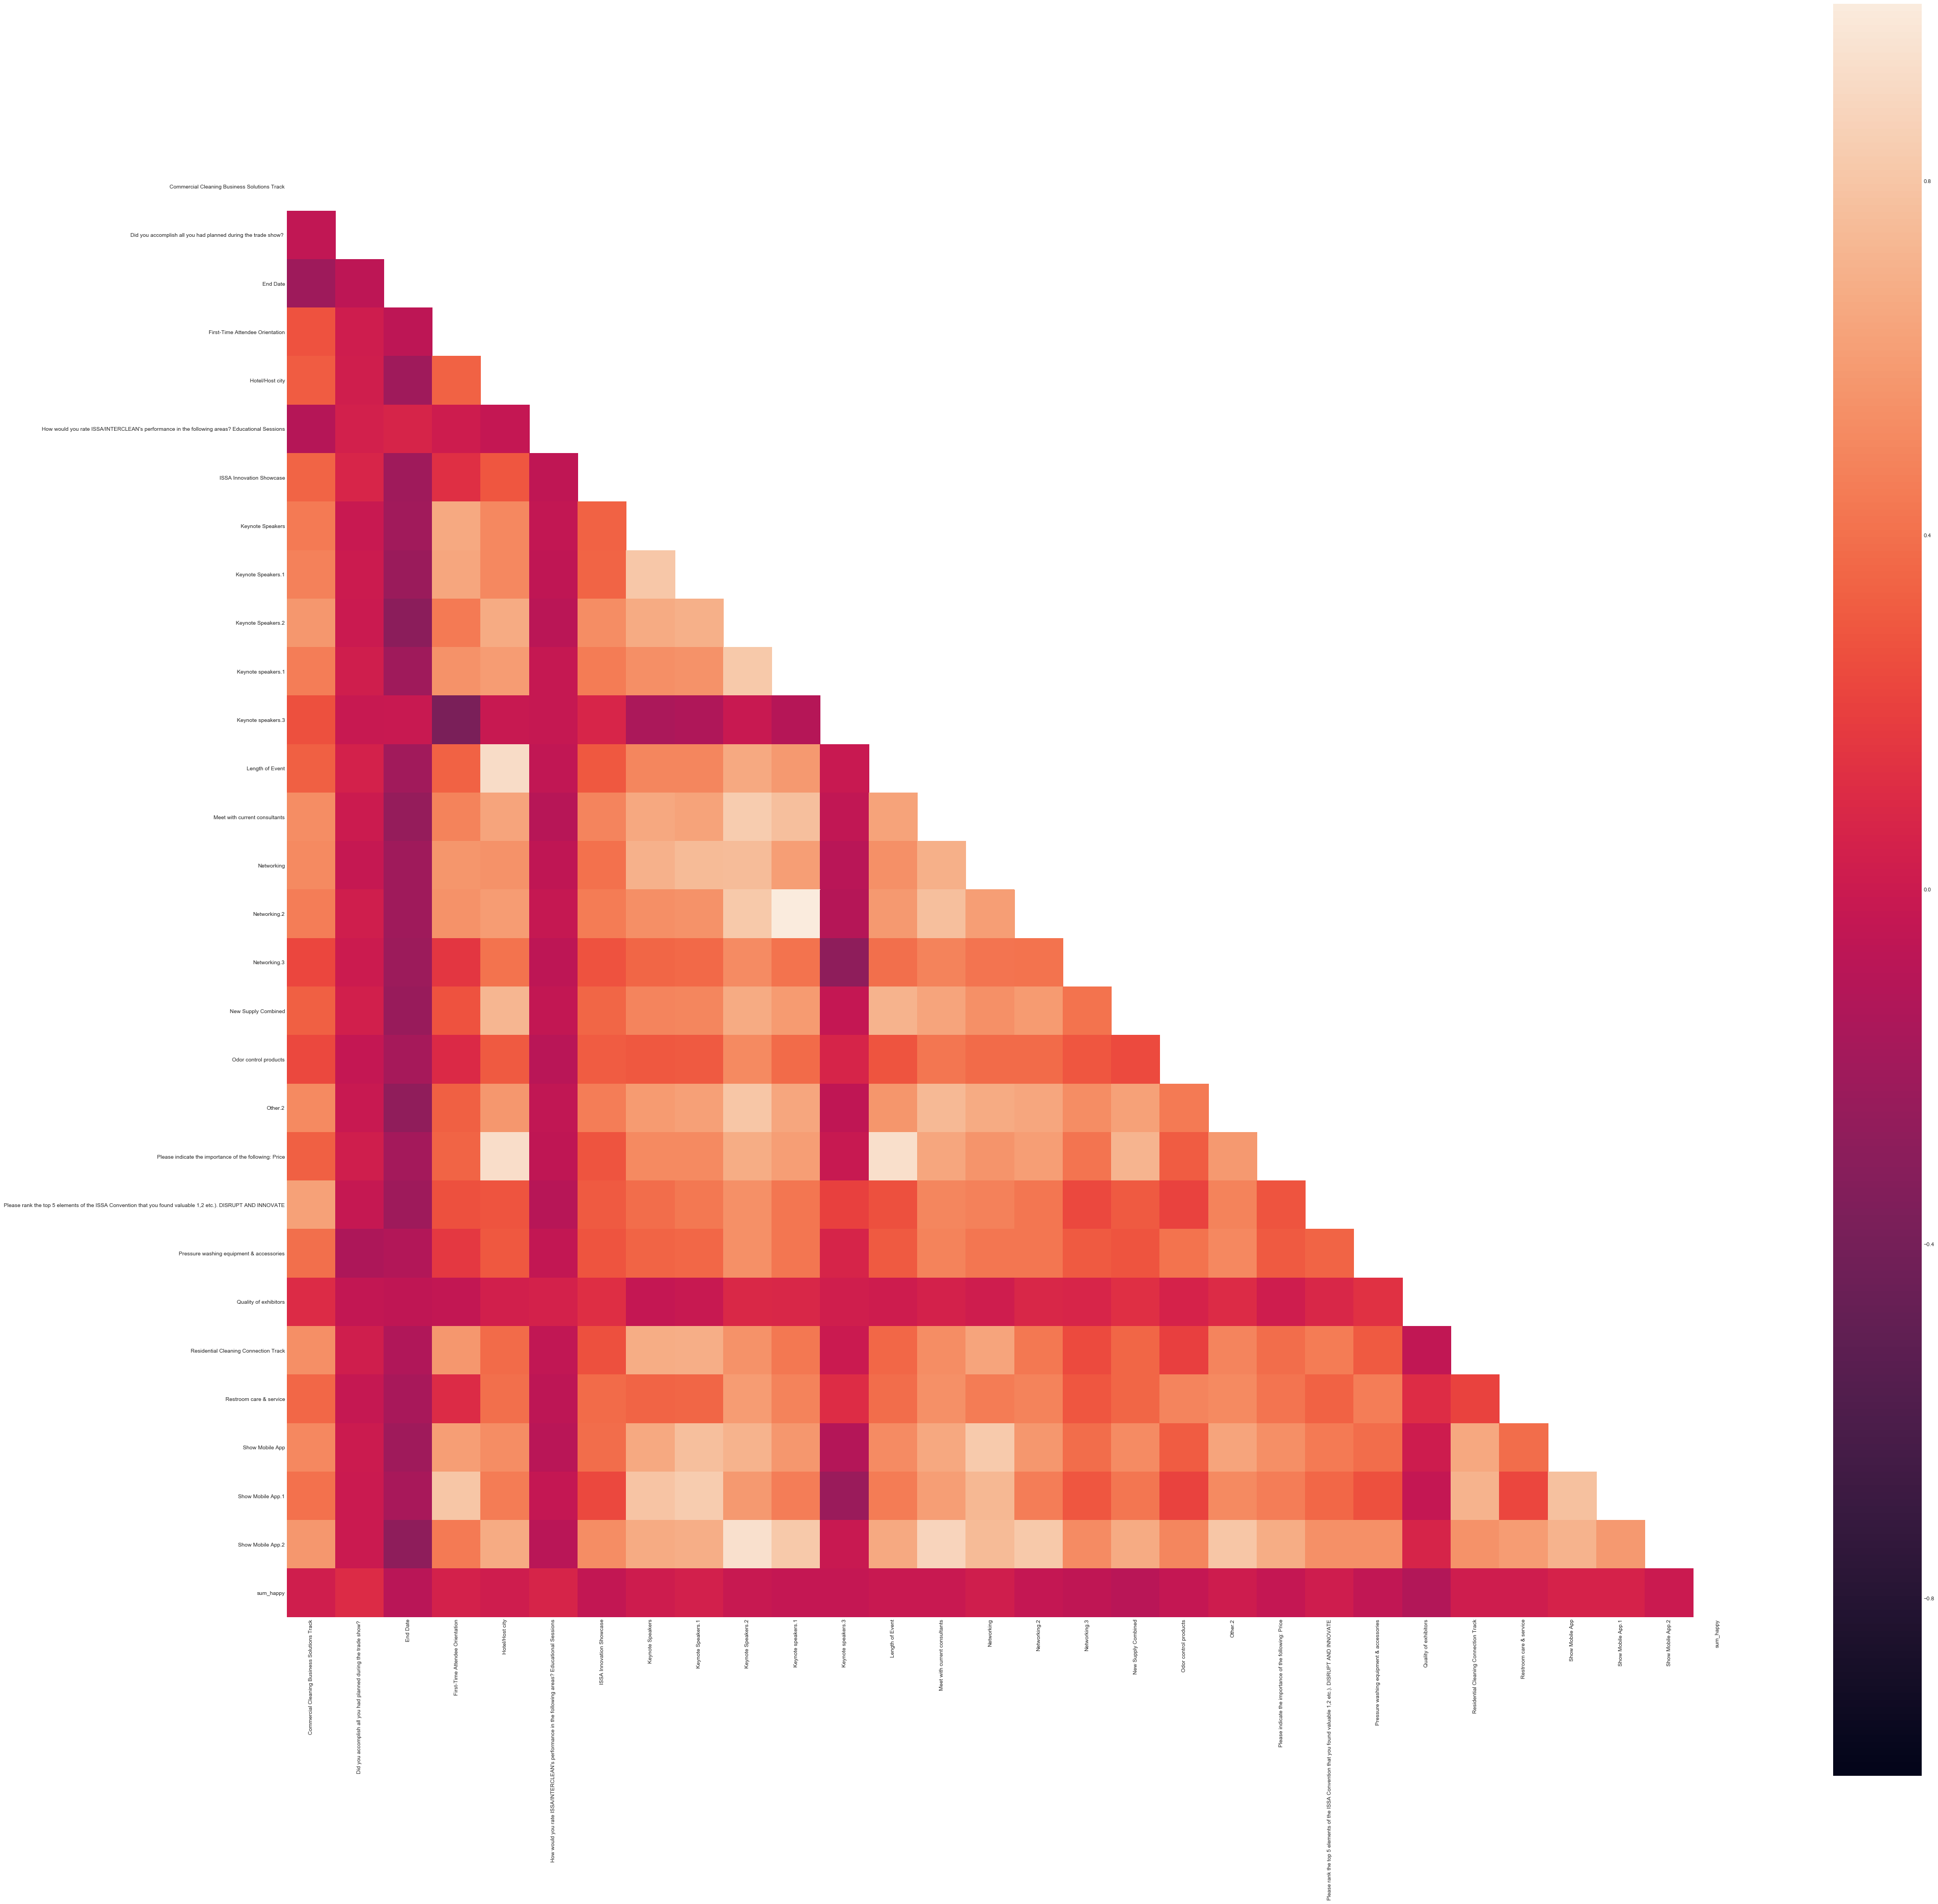

In [129]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [232]:
sum_pos = Z.loc[(Z['sum_happy']==3) | Z['sum_happy']==1]

In [233]:
sum_pos

ARCSI Rountables  Booth visits to a new exhibitor or supplier:  \
1        7.356615e+16                                  7.000000e+00   
2        6.283686e+16                                  1.000000e+01   
3        6.556846e+16                                  1.000000e+01   
4        6.417204e+16                                  4.000000e+01   
5        5.912999e+16                                  1.500000e+01   
7        6.853647e+16                                  6.853647e+16   
9        6.701326e+16                                  6.701326e+16   
10       6.555637e+16                                  8.000000e+00   
11       6.154271e+16                                  1.000000e+02   
12       7.013005e+16                                  7.013005e+16   
13       6.282483e+16                                  1.000000e+01   
14       6.154262e+16                                  2.500000e+01   
15       3.000000e+00                                  8.000000e+00   
16       7.179937e+16                                  7.179937e+16   
17       6.555531e+16                                  6.555531e+16   
18       5.584330e+16                                  5.000000e+01   
19       1.000000e+00                                  6.701119e+16   
20       6.555437e+16                                  6.555437e+16   
21       6.030993e+16                                  8.000000e+00   
22       6.853390e+16                                  2.500000e+01   
23       5.482696e+16                                  5.000000e+01   
24       6.415916e+16                                  6.415916e+16   
25       5.799000e+16                                  5.000000e+00   
27       5.384786e+16                                  1.000000e+01   
28       6.154013e+16                                  5.000000e+00   
29       6.415882e+16                                  2.000000e+00   
30       6.282216e+16                                  7.000000e+00   
31       5.798965e+16                                  3.500000e+01   
34       5.199064e+16                                  1.000000e+01   
35       1.000000e+00                                  2.000000e+02   
..                ...                                           ...   
717               NaN                                           NaN   
719               NaN                                           NaN   
721               NaN                                           NaN   
722               NaN                                           NaN   
723               NaN                                           NaN   
725               NaN                                           NaN   
726               NaN                                           NaN   
727               NaN                                           NaN   
730               NaN                                           NaN   
731               NaN                                           NaN   
733               NaN                                           NaN   
734               NaN                                           NaN   
735               NaN                                           NaN   
736               NaN                                           NaN   
737               NaN                                           NaN   
738               NaN                                           NaN   
739               NaN                                           NaN   
740               NaN                                           NaN   
742               NaN                                           NaN   
744               NaN                                           NaN   
745               NaN                                           NaN   
746               NaN                                           NaN   
747               NaN                                           NaN   
748               NaN                                           NaN   
749               NaN        

In [234]:
corr = sum_pos.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

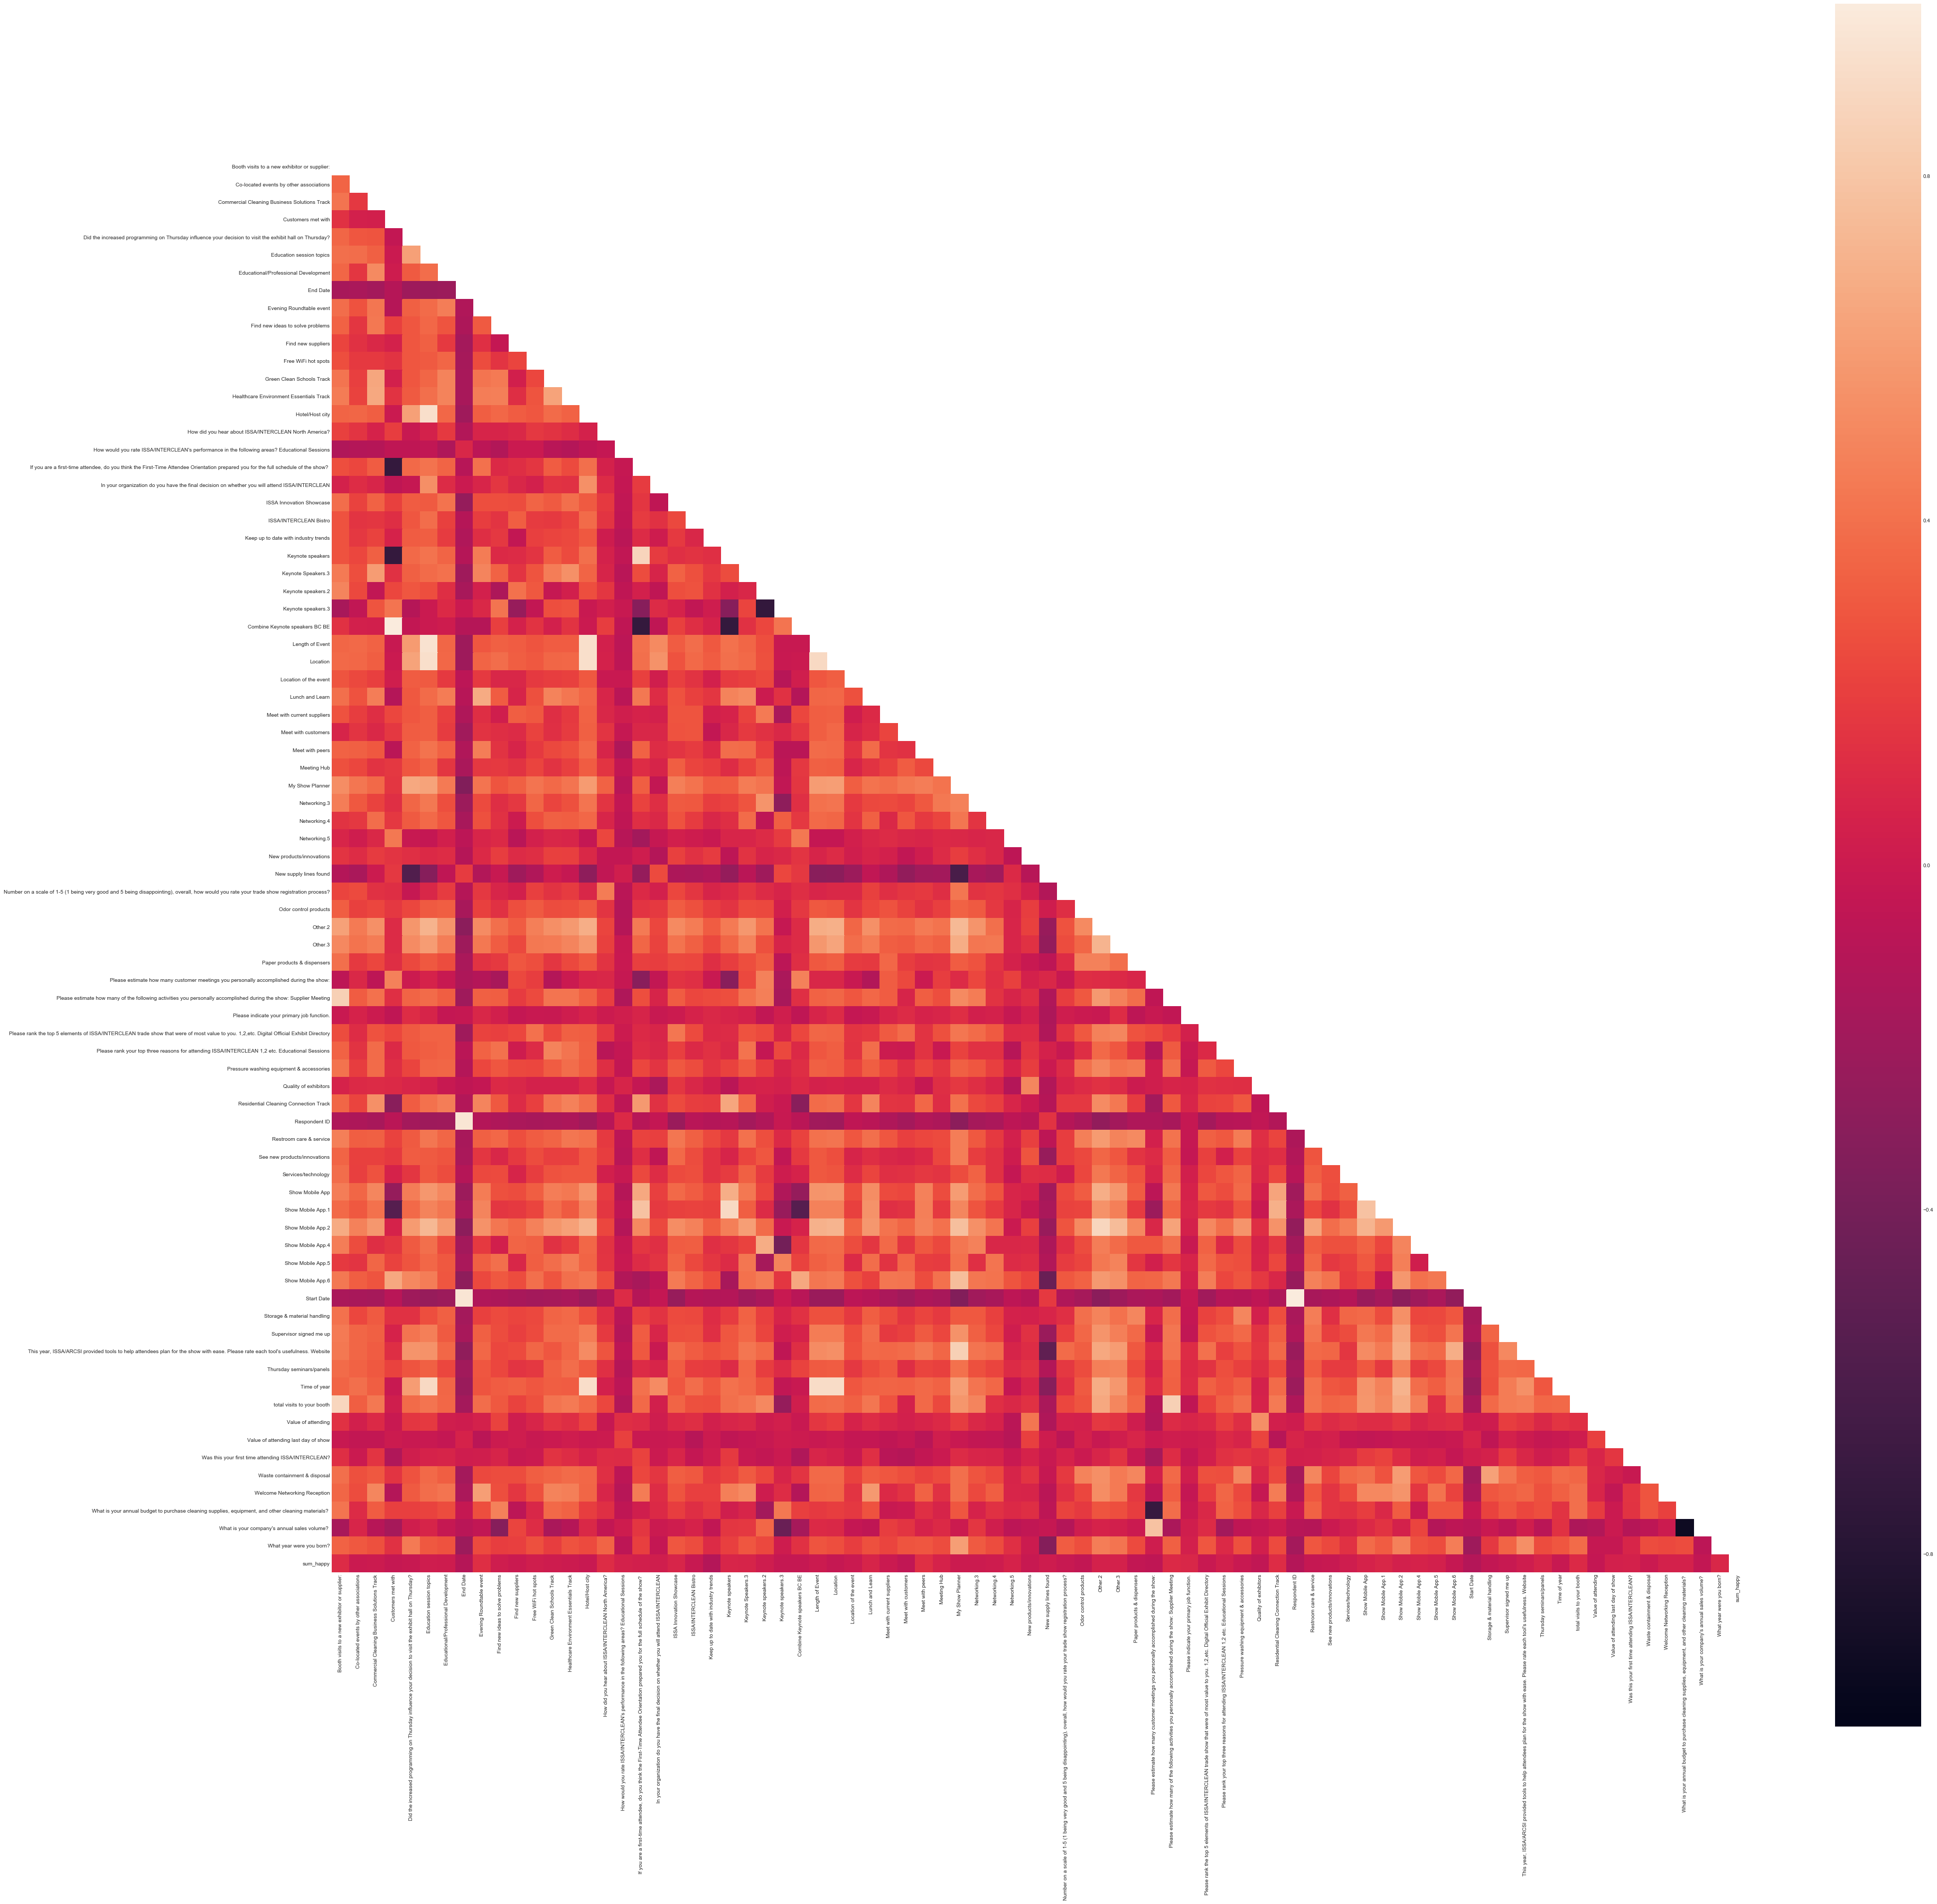

In [235]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [223]:
sum_neg = Z.loc[Z['sum_happy']==1]

In [224]:
corr = sum_neg.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

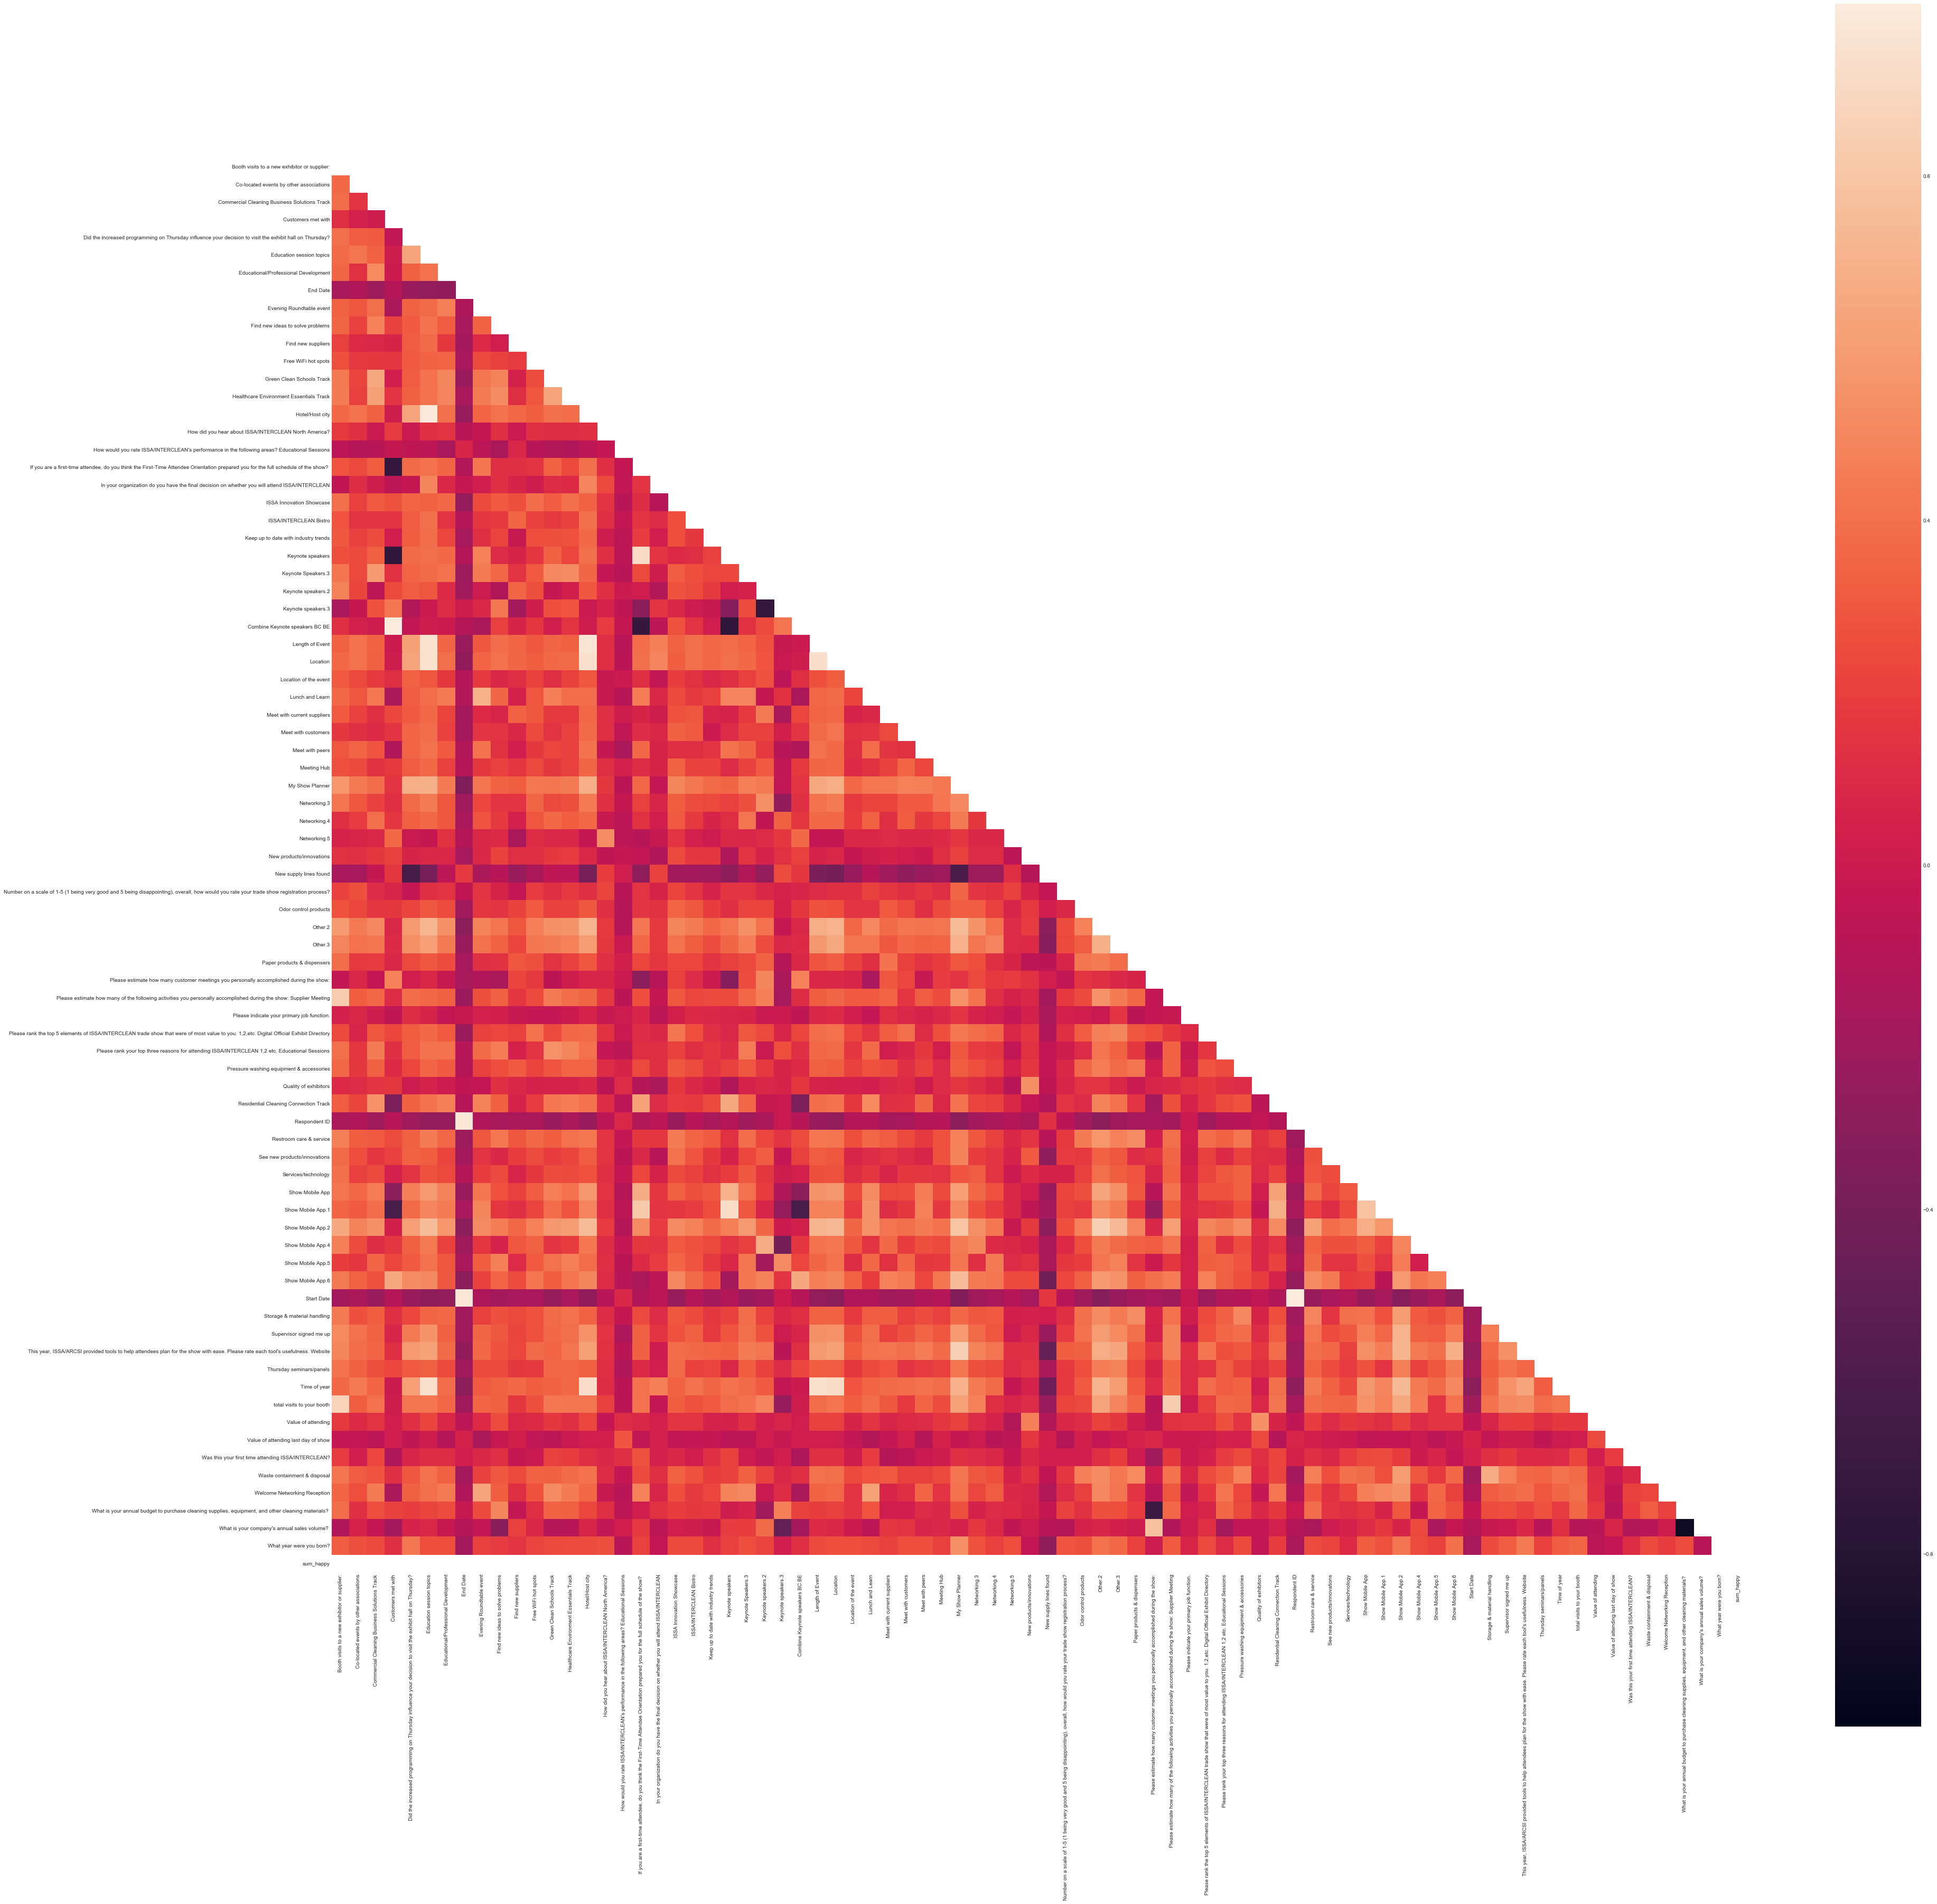

In [225]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = RandomForestClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
estimator = AdaBoostClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
fit.grid_scores_.sort()

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
model=[]
model = KNeighborsClassifier(n_neighbors = 3,)
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
msg = cv_results.mean(), cv_results.std()
print(msg)


In [ ]:
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] ==1:
        print b, X.columns[b]

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator, cv= kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
for a in range(1,11):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
butter = fit.grid_scores_.sort()


In [ ]:
fit.grid_scores_

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
X.columns

In [ ]:
print('Feature  Accuracy')
for i in range(n_feats):
    X = iris.data[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)

    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
rfe = RFE(model,1 )
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
model = ExtraTreesClassifier(random_state = seed)
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)
          
print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]
print("Optimal number of features : %d" % fit.n_features_)
print("Feature Ranking: %s") % fit.ranking_   

In [ ]:
print("Optimal number of features : %d" % rfe.n_features_)

In [ ]:
print( rfe.ranking_)

In [ ]:
print( rfe.ranking_)

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
fit = rfe.fit(X,y)
rfe = RFE(model,1)
    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
#models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', probability = True, random_state = seed)))

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)

In [ ]:

def test_ensemble(elist,single_score):
    
    for l in range(0, len(elist)):
        model1=elist[l]
        for j in range((l+1), len(elist)):
            model2=elist[j]
            for k in range((j+1), len(elist)):
                model3=elist[k]
                estimators=[]
                estimators.append(model1)
                estimators.append(model2)
                estimators.append(model3)
                #try:
                    
                ensemble = VotingClassifier(estimators, voting='soft')
                cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = None, cv=kfold) 
                if cv_results.mean() > single_score:
                    print estimators[0][0], estimators[1][0], estimators[2][0]
                    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
                    print msg
                
                 
                
                #except:
                    #msg = " BREAK with: " + estimators[0][0], estimators[1][0],estimators[2][0]
                    #print msg
                    
           

In [ ]:
test_ensemble(models, 0.65)

In [ ]:
LDA ExtraTreesClassifier SVC

In [ ]:
estimators=[]
model1 = LinearDiscriminantAnalysis()
estimators.append(('LDA', model1))
model2 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model2))
model3 = SVC(kernel = 'linear', probability = True, random_state = seed)
estimators.append(('SVC', model3))
ensemble = VotingClassifier(estimators, voting='soft')
ensemblefit = ensemble.fit(X,y)
rfe = RFE(ensemblefit,1)
fit = rfe.fit(X,y)
#kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
#cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
#msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print( fit.ranking_)


In [ ]:
estimators = []
model1 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier(random_state = seed)
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
estimators = []
model1 = ExtraTreesClassifier()
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = scoring, cv=kfold) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
GradientBoostingClassifier(n_estimators= 32, learning_rate= 0.1, random_state= 7, max_depth= 3)

In [ ]:
param_grid = {'n_estimators': [10,20,30], 'learning_rate': [.1,.01,.001], 'random_state': [7], 'max_depth': [2,3,5,7]}
local_cv(GradientBoostingClassifier(), param_grid)

In [ ]:
def local_cv(model, params):                             #KFOLD WITH GRID SEARCH
    param_grid = params
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
Finding and recommendations,  The question you want to predict for, ask first in your survey, for optimal data collection